<a href="https://colab.research.google.com/github/Herzanet002/ML2023/blob/main/DecisionTreeClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pandas
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [24]:
dataset = pandas.read_csv("/content/sample_data/smoke_detection_iot.csv")
dataset.drop(['Unnamed: 0', 'UTC'], axis=1, inplace=True)
dataset.head(10)

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.0,0.00,0.0,0.000,0.00,0,0
1,20.015,56.67,0,400,12345,18651,939.744,0.0,0.00,0.0,0.000,0.00,1,0
2,20.029,55.96,0,400,12374,18764,939.738,0.0,0.00,0.0,0.000,0.00,2,0
3,20.044,55.28,0,400,12390,18849,939.736,0.0,0.00,0.0,0.000,0.00,3,0
4,20.059,54.69,0,400,12403,18921,939.744,0.0,0.00,0.0,0.000,0.00,4,0
5,20.073,54.12,0,400,12419,18998,939.725,0.0,0.00,0.0,0.000,0.00,5,0
6,20.088,53.61,0,400,12432,19058,939.738,0.0,0.00,0.0,0.000,0.00,6,0
7,20.103,53.20,0,400,12439,19114,939.758,0.0,0.00,0.0,0.000,0.00,7,0
8,20.117,52.81,0,400,12448,19155,939.758,0.0,0.00,0.0,0.000,0.00,8,0
9,20.132,52.46,0,400,12453,19195,939.756,0.9,3.78,0.0,4.369,2.78,9,0


In [25]:
dataset['Fire Alarm'].value_counts()

1    44757
0    17873
Name: Fire Alarm, dtype: int64

In [26]:
x_data = dataset.loc[:, "Temperature[C]":"CNT"]
x_data

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT
0,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0
1,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1
2,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2
3,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3
4,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739
62626,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740
62627,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741
62628,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742


In [27]:
y_data = dataset["Fire Alarm"]
y_data

0        0
1        0
2        0
3        0
4        0
        ..
62625    0
62626    0
62627    0
62628    0
62629    0
Name: Fire Alarm, Length: 62630, dtype: int64

In [28]:
from sklearn.preprocessing import RobustScaler
data_scaled= RobustScaler()
x_scaled=data_scaled.fit_transform(x_data)
x_scaled

array([[-0.00901823,  1.26269702, -0.92634561, ..., -2.24624277,
        -2.44444444, -0.68953802],
       [-0.00797766,  1.14185639, -0.92634561, ..., -2.24624277,
        -2.44444444, -0.68946416],
       [-0.00700647,  1.01751313, -0.92634561, ..., -2.24624277,
        -2.44444444, -0.6893903 ],
       ...,
       [-0.08761555, -6.00875657, -0.33427762, ..., -1.53294798,
        -1.66666667, -0.26551941],
       [-0.07263141, -5.9737303 , -0.32389046, ..., -1.53988439,
        -1.66666667, -0.26544555],
       [-0.05764728, -5.88966725, -0.31916903, ..., -1.54450867,
        -1.66666667, -0.26537169]])

In [29]:
x_scaled.min()


-11.091922005571712

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_data, test_size=0.3) #70-train, 30%-tests

In [31]:
classifier = DecisionTreeClassifier()
classifier = classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

print("Доля правильных ответов на тренировочном сете: {:.4f}".format(classifier.score(x_train, y_train)))
print("Доля правильных ответов на тестовом сете: {:.4f}".format(classifier.score(x_test, y_test)))

Доля правильных ответов на тренировочном сете: 1.0000
Доля правильных ответов на тестовом сете: 1.0000


In [32]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, recall_score
roc_auc_score(y_test, y_pred),f1_score(y_test, y_pred),recall_score(y_test, y_pred)

(1.0, 1.0, 1.0)

In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 5333,     0],
       [    0, 13456]])

In [34]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus


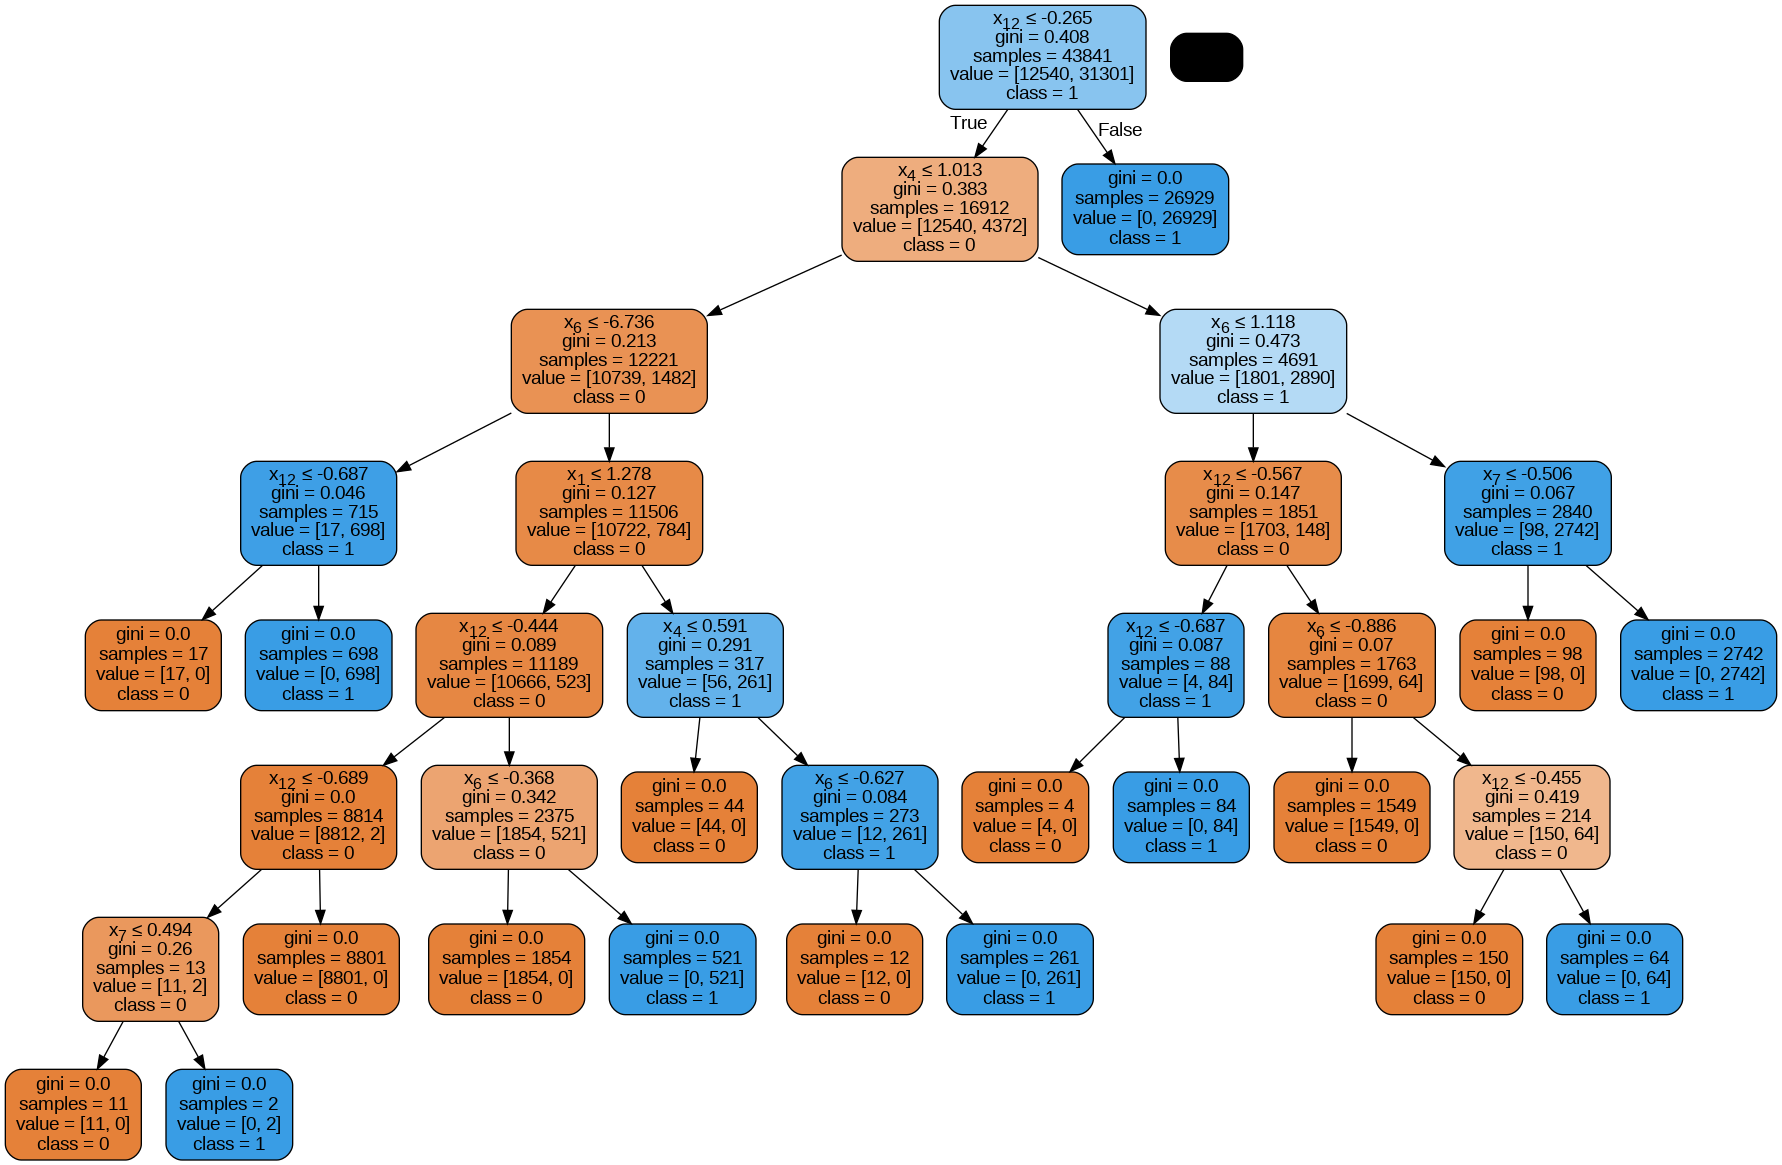

In [35]:
dot_data = StringIO()
export_graphviz(classifier, out_file = dot_data, filled=True, rounded=True, special_characters=True, class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('graphic.png')
Image(graph.create_png())

In [36]:
entr_classifier = DecisionTreeClassifier(criterion="entropy", max_depth=4)
entr_classifier.fit(x_train, y_train)
y1_pred = entr_classifier.predict(x_test)

print("Доля правильных ответов на тренировочном сете: {:.4f}".format(entr_classifier.score(x_train, y_train)))
print("Доля правильных ответов на тестовом сете: {:.4f}".format(entr_classifier.score(x_test, y_test)))

Доля правильных ответов на тренировочном сете: 0.9811
Доля правильных ответов на тестовом сете: 0.9813


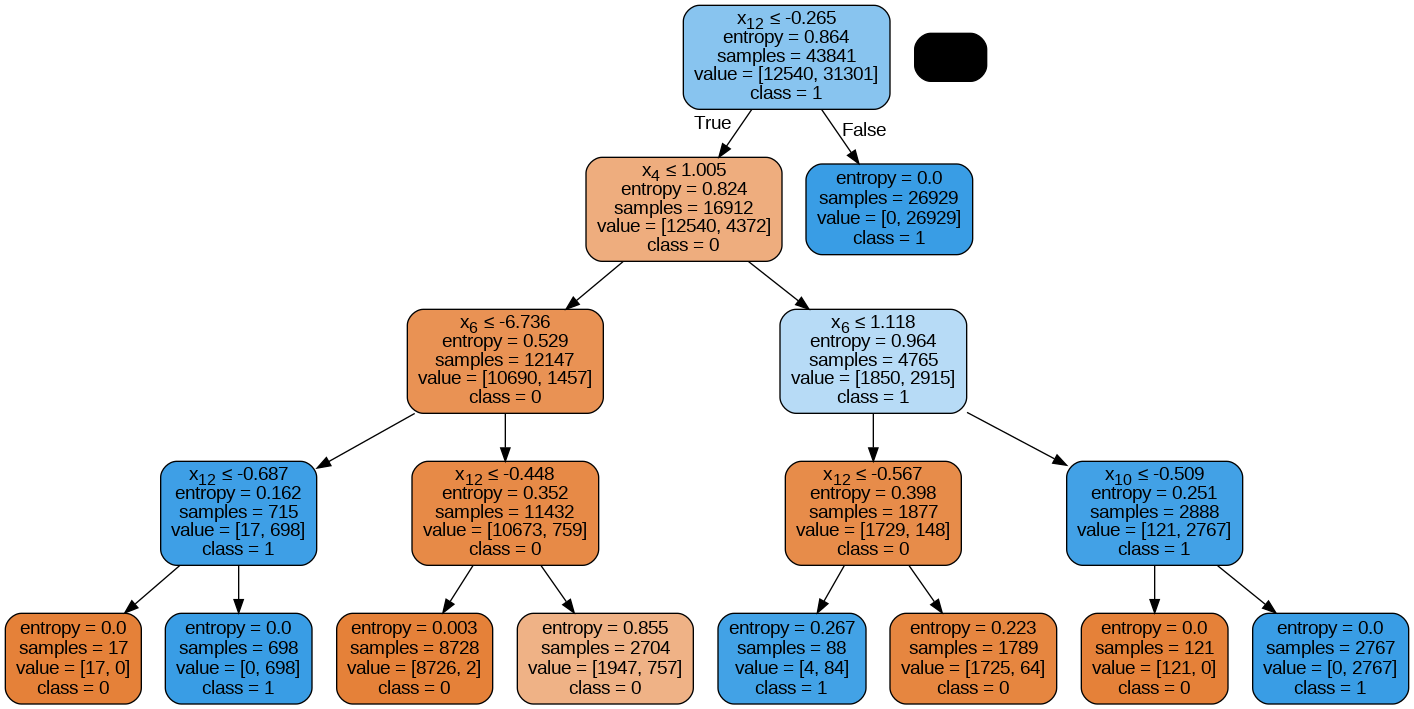

In [37]:
dot_data = StringIO()
export_graphviz(entr_classifier, out_file = dot_data, filled=True, rounded=True, special_characters=True, class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('graphic.png')
Image(graph.create_png())

In [38]:
#Случайный лес
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

rand_forest_classifier = RandomForestClassifier(n_estimators=5, bootstrap = True, max_features = 'sqrt', random_state=2, max_depth=4)
rand_forest_classifier = rand_forest_classifier.fit(x_train, y_train)
y_pred = rand_forest_classifier.predict(x_test)

print("Доля правильных ответов на тренировочном сете: {:.4f}".format(rand_forest_classifier.score(x_train, y_train)))
print("Доля правильных ответов на тестовом сете: {:.4f}".format(rand_forest_classifier.score(x_test, y_test)))

Доля правильных ответов на тренировочном сете: 0.9984
Доля правильных ответов на тестовом сете: 0.9987


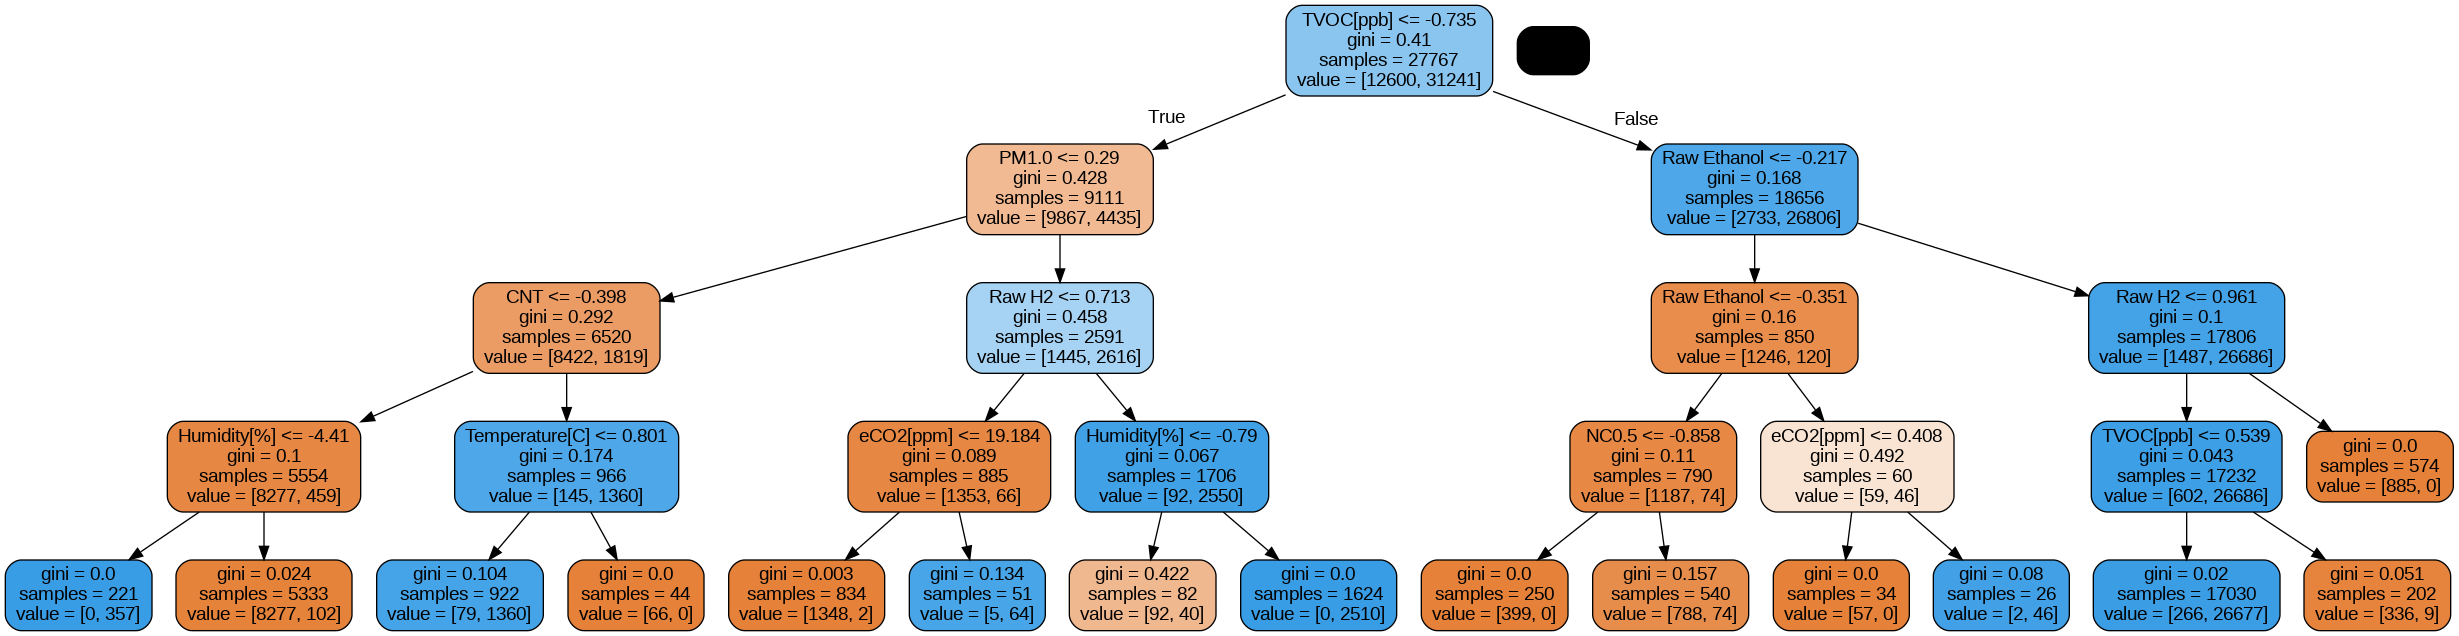

In [39]:
dot_data = StringIO()
export_graphviz(rand_forest_classifier.estimators_[0], out_file = dot_data,
                feature_names=x_data.columns,
                filled=True,
                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('graphic.png')
Image(graph.create_png())

In [40]:
from sklearn.manifold import TSNE
import numpy as np
import seaborn as sns
import matplotlib.patheffects as PathEffect
import matplotlib.pyplot as plt
%matplotlib inline

tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=250)
tsne_pca_results = tsne.fit_transform(x_data)

pallete = np.array(sns.color_palette('hls', 10))
f = plt.figure(figsize=(8, 8))
ax = plt.subplot(aspect='equal')
sc = ax.scatter(tsne_pca_results[:, 0], tsne_pca_results[:, 1], lw=0, s=40, 
                c=pallete[y_data])
plt.xlim(-25, 25)
plt.ylim(-25, 25)
ax.axis('tight')

KeyboardInterrupt: ignored

In [ ]:
import numpy as np
D = 13
N = 11
x = []
for i in range(D):
  x.append(np.linspace(-3, 3, N))

np.meshgrid(*x)

In [ ]:
nx, ny = (3, 2)
x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)

x

In [ ]:

D = 13
n_bins =  100*np.ones(D)
bounds = np.repeat([(0,1)], D, axis = 0)

result = np.mgrid[[slice(row[0], row[1], n*1j) for row, n in zip(bounds, n_bins)]]
ans = np.mgrid[0:1:100j,0:1:100j,0:1:100j]

xx, yy = np.mgrid[-1.5:2.5:.01, -1.:1.5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]

pred_value = rand_forest_classifier.predict(grid).reshape(xx.shape)

f, ax = plt.subplots(figsize=(16, 10))
ax.set_title("Decision boundary", fontsize=14)
contour = ax.contourf(xx, yy, pred_value, 25, cmap="RdBu",
                      vmin=0, vmax=1)

ax.scatter(x_data[100:,0], x_data[100:, 1], c=y_data[100:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

plt.show()